# COMP 4030/6030 Final Exam


**NAME**:  Cheng Yang

**Instructions:**

* Answer each question clearly.

* You can work in a Jupyter notebook, but export it to an HTML file and turn that in.

* You may review the course's notebooks. You may not ask or discuss with anyone else.  You may not use code/answers online.  Cheating results in a grade of 0 for the exam and a report to the college and department.

---
**Problem 1 (10 points)**

Use the definition of $\Theta$ to show that $5 + 10n^4 + 6n^2 \in \Theta(n^4)$

$5+10n^4+6n^2 \le 5n^4+10n^4+6n^4 = (5+10+6)n^4 = 21 n^4$

$5+10n^4+6n^2 \in O(n^4)$

$5+10n^4+6n^2 \ge 10n^4$

$5+10n^4+6n^2 \in \Omega(n^4)$

$5+10n^4+6n^2 \in \Theta(n^4)$


---

**Problem 2 (10 points)**

Show that the running time of the following program is $O(n^3)$.


In [1]:
#
# Input: L is a list of numbers, x is some number.
#
def pro2(L, x):
    s = 0
    for i in range(len(L)):
        for j in range(len(L)):
            for k in range(i+j, len(L)):
                s = i + j + k
                if s == x:
                    return True
    return False


$T(n) = c_1+c_2n^3$

$T(n) \le c_1n^3+c_2n^3 = (c_1+c_2)n^3=cn^3$

$T(n) \in O(n^3)$

---

**Problem 3 (10 points)**

Use the Master's theorem to find the complexity of this equation: $T(n) = 5n^4 + 18 \cdot T({n \over 2})$.

d=4, a=18, b=2

$\log_b(a)= \log_2(18)=4.17 > 4$


$T(n) \in \Theta(n^{log_2(18)})$

---

**Problem 4 (15 points)**

Find the running time equations and compare the running time complexities of these two programs. Which is faster for large inputs? Explain and how you find the complexities of the programs.

Note: although you're not told specifically which technique to use to find the complexity of these programs, you should know how to do so.

In [ ]:
#
# Input: L is a list of numbers
#
def prob4a(L):
    if len(L)<=1:
        return 5
    t = 0
    for x in L:
        t += x
    left = L[0 : len(L)//2]
    right = L[len(L)//2 : len(L)]
    return t + prob4a(left) + prob4a(right) 

$T(n)= c_1 +c_2n+2T(n/2)$

d=1, a=2, b =2

$\log_b(a)=\log_2(2)=1$

$T(n)\in \Theta(n \log n)$

In [2]:
#
# Input: L is a list of numbers
#
def prob4b(L):
    if len(L)<=1:
        return 5
    t = 0
    for i in range(len(L)):
        for j in range(len(L)):
            t += L[i] * L[j]
    left = L[0 : len(L)//2]
    return t + prob4b(left)

$T(n)=c_1 +c_2n^2+T(n/2)$

d=2, a=1, b=2

$ \log_b(a)= \log_2(1)=0$

$T(n) \in \Theta(n^2)$

prob4a run faster,beacuse  $n^2$ grow faster than $n \log n$

---

**Problem 5 (20 points)**

The following tree data structure was used in the midterm exam.  

A tree is just a node with three subtrees: left, right, middle.  Each of them is also a tree node, or a subtree rooted at the node.

A leaf is a tree node without left, right, and middle (they're None).

In the problem, you write a program (complete the code below) to find the longest path from the root of the input tree to any leaf.  (The length of a path is simply the number of nodes in the path).

**Hint: Your program should use the same procedure to compute the length of the left, right and middle subtrees**.


Here's the code of how such a tree is constructed.  You don't need to understand how it works to do this problem. But it can be helpful.
```
import random

class Tree:
    def __init__(self, m=None):
        if m is None:
            m = random.randint(2, 7)
        self.left = None
        self.right = None
        self.middle = None
        if random.randint(0, m) > 0:
            self.left = Tree(m-1)
        if random.randint(0, m) > 0:
            self.right = Tree(m-1)
        if random.randint(0, m) > 0:
            self.middle = Tree(m-1)

    def print(self, indents=0, name='*'):
        print('\t'*indents + name)
        if self.left is not None:
            self.left.print(indents+1, 'l')
        else:
            print('\t'*(indents+1) + '.')
        if self.middle is not None:
            self.middle.print(indents+1, 'm')
        else:
            print('\t'*(indents+1) + '.')
        if self.right is not None:
            self.right.print(indents+1, 'r')
        else:
            print('\t'*(indents+1) + '.')
```

**Complete the code below to solve the problem.**

In [85]:
#
# Input: t is a tree node (or a tree root)
# Output: the length of the longest path from t to a leaf.
#
import random

class Tree:
    def __init__(self, m=None):
        if m is None:
            m = random.randint(2, 7)
        self.left = None
        self.right = None
        self.middle = None
        if random.randint(0, m) > 0:
            self.left = Tree(m-1)
        if random.randint(0, m) > 0:
            self.right = Tree(m-1)
        if random.randint(0, m) > 0:
            self.middle = Tree(m-1)

    def print(self, indents=0, name='*'):
        print('\t'*indents + name)
        if self.left is not None:
            self.left.print(indents+1, 'l')
        else:
            print('\t'*(indents+1) + '.')
        if self.middle is not None:
            self.middle.print(indents+1, 'm')
        else:
            print('\t'*(indents+1) + '.')
        if self.right is not None:
            self.right.print(indents+1, 'r')
        else:
            print('\t'*(indents+1) + '.')
a_tree = Tree(4)
a_tree.print()
visited=[]
queue=[]
def prob5(t):
     
    # If root is null means there
    # is no binary tree so
    # return a empty vector
    if (t == None):
        return []

    rightvect = prob5(t.right)

    leftvect = prob5(t.left)
 
    if (len(leftvect) > len(rightvect)):
        leftvect.append('l')
    else:
        rightvect.append('r')

    if len(leftvect) > len(rightvect):
        return leftvect
 
    return rightvect   
        

prob5(a_tree)
    

*
	l
		.
		.
		r
			l
				l
					.
					.
					.
				.
				r
					.
					.
					.
			.
			r
				.
				.
				r
					.
					.
					.
	.
	.


['r', 'r', 'r', 'r', 'l']

---

**Problem 6 (15 points)**

The make_change program below not only determines if it's possible to make change for an amount given coin values, but also returns an actual solution.

Sample inputs and outputs:

+ Input: coins=[3,7], amount=17. Output: True, [3, 7, 7].
+ Input: coins=[3,7,9], amount=9. Output: True, [3, 3, 3]. Explanation: even if there's + more than one ways to make change, you only need to return one of them.
+ Input: coins=[3,7], amount=8. Output: False, [].

```
def make_change(coins, amount, changes):
    if amount==0:
        return True, changes
    for c in coins:
        if amount >= c:
            yes, new_changes = make_change(coins, amount-c, changes+[c])
            if yes:
                return True, new_changes
    return False, []
```

This recursive program is slow because the same recursive calls might be repeatedly computed. We learned that to solve this we should store outputs, using inputs as keys of a dictionary.

Revise this program so that it stores outputs and simply returns them if the inputs are already computed.

Hints: as we discussed about this technique, you don't have to use all inputs as keys; only those that are changed during the course of the execution.

In [13]:
#
# Complete this program to solve the problem
#
def make_change(coins, amount, changes):
    if amount in Table:
        return Table[amount]
    if amount==0:
        Table[amount]=[True,changes]
        return True, changes
    for c in coins:
        if amount >= c:
            yes, new_changes = make_change(coins, amount-c, changes+[c])
            if yes:
                Table[amount]=[True,new_changes]
                return True, new_changes
    Table[amount]=[False,[]]
    return False, []





In [87]:
#
# Test your program here:
#

Table = {}
make_change([3,7], 17, [])


#
# Add other test cases
#
Table = {}
make_change([3,7,9], 9, [])


(True, [3, 3, 3])

---

**Problem 7 (10 points)**

Given a network (graph), use backtracking to find all sets of nodes in which there's no connections between any nodes.   

Further, each set of nodes must have at least 3 nodes.

For example, in the network below, the set {2, 7, 4} is such a set of nodes.  There are no edges/connections among these 3 nodes.

You must use backtracking to generate all such sets.   

Each set corresponds to a group of people who mutually don't know each other in a social network.

Note: **you must show how your program works, at least using the network below.**


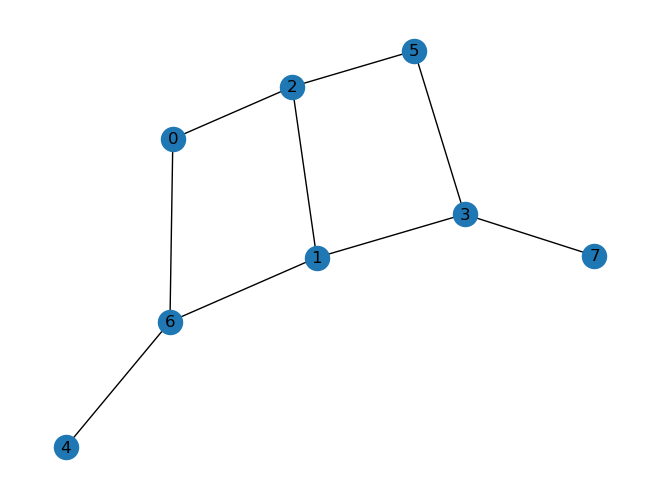

In [20]:
import networkx as nx
my_network = nx.gnp_random_graph(8, 0.25, seed=12345)
nx.draw(my_network, with_labels=True)

In [54]:
#
# Complete this code to solve problem 7.
#
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]
def is_valid(solution, network):
    nodes = get_nodes(solution)
    for  (a,b) in network.edges:
        if a in nodes and b in nodes:
            return False
    for  (b,a) in network.edges:
        if a in nodes and b in nodes:
            return False
    for  (a,c) in network.edges:
        if a in nodes and c in nodes:
            return False
    for  (c,a) in network.edges:
        if a in nodes and c in nodes:
            return False
    for  (b,c) in network.edges:
        if b in nodes and c in nodes:
            return False
    for  (c,b) in network.edges:
        if b in nodes and c in nodes:
            return False
    if len(nodes)!=3:
        return False
    return True
def prob7(solution, i, network):
    if i==len(solution):
        if is_valid(solution, network):
            nodes = get_nodes(solution)
            print(nodes)
    else:
        for p in [True,False]:
            solution[i] = p
            prob7(solution, i+1, network)
    




[0, 1, 2]
[0, 1, 3]
[0, 1, 5]
[0, 1, 6]
[0, 1, 7]
[0, 2, 3]
[0, 2, 6]
[0, 2, 7]
[0, 2, 9]
[0, 3, 5]
[0, 3, 6]
[0, 3, 7]
[0, 5, 6]
[0, 5, 9]
[0, 6, 7]
[0, 7, 9]
[1, 2, 3]
[1, 2, 6]
[1, 2, 7]
[1, 2, 8]
[1, 3, 5]
[1, 3, 6]
[1, 3, 7]
[1, 5, 6]
[1, 6, 7]
[1, 7, 8]
[2, 3, 4]
[2, 3, 6]
[2, 3, 7]
[2, 4, 6]
[2, 4, 8]
[2, 4, 9]
[2, 6, 7]
[2, 7, 8]
[2, 7, 9]
[2, 8, 9]
[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[3, 6, 7]
[4, 5, 6]
[4, 5, 9]
[4, 8, 9]
[7, 8, 9]


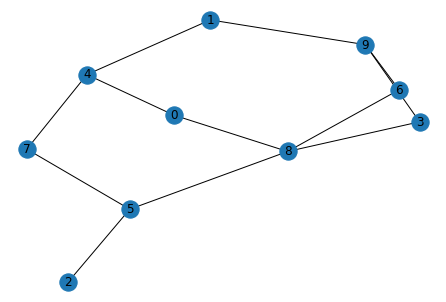

In [55]:
#
# Test your program here
#
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=2021)
nx.draw(my_network, with_labels=True)
prob7([None]*len(my_network), 0, my_network)




---

**Problem 8 (10 points)**

Continuing from the previous problem, use backtracking to find the largest group of nodes in a network without mutual connections.

For example, in the network above, the set {0, 1, 4, 5, 7} is the largest group of nodes.  There might be multiple largest group of nodes with the same number of nodes. Any of such group of nodes.

Note that in your solution, you have one extra input, "largest_set".

Note: **you must show how your program works, at least using the same network above.**


In [63]:
#
# Complete this code to solve problem 8.
#

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]
def is_valid(solution, network):
    nodes = get_nodes(solution)
    for  (a,b) in network.edges:
        if a in nodes and b in nodes:
            return False
    for  (b,a) in network.edges:
        if a in nodes and b in nodes:
            return False
    for  (a,c) in network.edges:
        if a in nodes and c in nodes:
            return False
    for  (c,a) in network.edges:
        if a in nodes and c in nodes:
            return False
    for  (b,c) in network.edges:
        if b in nodes and c in nodes:
            return False
    for  (c,b) in network.edges:
        if b in nodes and c in nodes:
            return False
    return True

def larger_group(s1, s2):
    return len(get_nodes(s1)) > len(get_nodes(s2))

def prob8(solution, i, network, best):
    if i==len(solution):
        if is_valid(solution, network):
            if larger_group(solution, best):
                for j in range(len(solution)):
                    best[j] = solution[j]
                print('updated best solution', get_nodes(best))
            nodes = get_nodes(solution)
            print(nodes)
    else:
        for p in [True,False]:
            solution[i] = p
            prob8(solution, i+1, network, best)



updated best solution [0, 1, 2, 3, 6, 7]
[0, 1, 2, 3, 6, 7]
[0, 1, 2, 3, 6]
[0, 1, 2, 3, 7]
[0, 1, 2, 3]
[0, 1, 2, 6, 7]
[0, 1, 2, 6]
[0, 1, 2, 7]
[0, 1, 2]
[0, 1, 3, 5, 6]
[0, 1, 3, 5]
[0, 1, 3, 6, 7]
[0, 1, 3, 6]
[0, 1, 3, 7]
[0, 1, 3]
[0, 1, 5, 6]
[0, 1, 5]
[0, 1, 6, 7]
[0, 1, 6]
[0, 1, 7]
[0, 1]
[0, 2, 3, 6, 7]
[0, 2, 3, 6]
[0, 2, 3, 7]
[0, 2, 3]
[0, 2, 6, 7]
[0, 2, 6]
[0, 2, 7, 9]
[0, 2, 7]
[0, 2, 9]
[0, 2]
[0, 3, 5, 6]
[0, 3, 5]
[0, 3, 6, 7]
[0, 3, 6]
[0, 3, 7]
[0, 3]
[0, 5, 6]
[0, 5, 9]
[0, 5]
[0, 6, 7]
[0, 6]
[0, 7, 9]
[0, 7]
[0, 9]
[0]
[1, 2, 3, 6, 7]
[1, 2, 3, 6]
[1, 2, 3, 7]
[1, 2, 3]
[1, 2, 6, 7]
[1, 2, 6]
[1, 2, 7, 8]
[1, 2, 7]
[1, 2, 8]
[1, 2]
[1, 3, 5, 6]
[1, 3, 5]
[1, 3, 6, 7]
[1, 3, 6]
[1, 3, 7]
[1, 3]
[1, 5, 6]
[1, 5]
[1, 6, 7]
[1, 6]
[1, 7, 8]
[1, 7]
[1, 8]
[1]
[2, 3, 4, 6]
[2, 3, 4]
[2, 3, 6, 7]
[2, 3, 6]
[2, 3, 7]
[2, 3]
[2, 4, 6]
[2, 4, 8, 9]
[2, 4, 8]
[2, 4, 9]
[2, 4]
[2, 6, 7]
[2, 6]
[2, 7, 8, 9]
[2, 7, 8]
[2, 7, 9]
[2, 7]
[2, 8, 9]
[2, 8]
[2, 9]
[2]
[3, 4, 5, 6

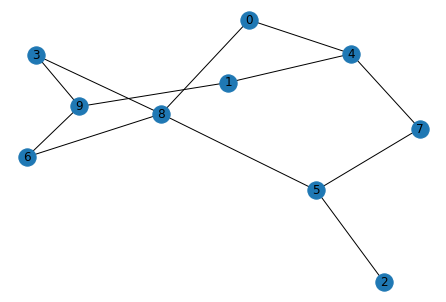

In [90]:
#
# Test your program here
#
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=2021)
nx.draw(my_network, with_labels=True)
best = [False]*len(my_network)
prob8([None]*len(my_network), 0, my_network, best)
print(f"the best solution: {get_nodes(best)}")

